# Intermittent decoherence blockade in a chiral ring environment

This notebook is based on a review for the article by Salvatore Lorenzo, Stefano Longhi, Albert Cabot, Roberta Zambrini & Gian Luca Giorgi.

https://www.nature.com/articles/s41598-021-92288-8

In [1]:
from numpy import *
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
plt.rcParams['text.usetex'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

## Function for $E_k^{\pm}/J$

In [3]:
def Ek(k, phi, rho_by_j): # the expression in eq 2 is turned in to for rhp by j
    return cos(k) - sqrt(cos(k)**2 + 2 * rho_by_j**2 *(1+cos(phi + k))), cos(k) + sqrt(cos(k)**2 + 2 * rho_by_j**2 *(1+cos(phi + k)))

In [4]:
N=100
phi = pi/2; rho_by_j = 1;
k = linspace(-pi, pi, N)
disp = Ek(k, phi, rho_by_j)

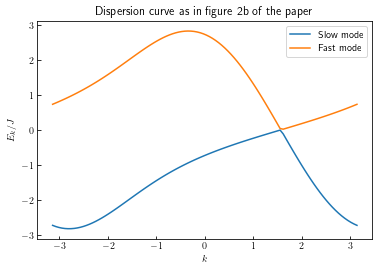

In [5]:
plt.plot(k, disp[0], label = 'Slow mode')
plt.plot(k, disp[1], label = 'Fast mode')
plt.xlabel('$k$')
plt.ylabel('$E_k/J$')
plt.title('Dispersion curve as in figure 2b of the paper')
plt.legend();

## Function for $N_k^{\pm}/J?$

In [6]:
def Nk():
    return sqrt(Ek(k, phi, rho_by_j)[0]**2 - Ek(k, phi, rho_by_j)[0] * Ek(k, phi, rho_by_j)[1]), \
sqrt(Ek(k, phi, rho_by_j)[1]**2 - Ek(k, phi, rho_by_j)[0] * Ek(k, phi, rho_by_j)[1])

In [7]:
phi = pi/2; rho_by_j = 1
Nks = Nk()

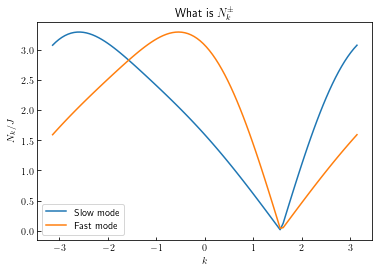

In [8]:
plt.plot(k, Nks[0], label = 'Slow mode')
plt.plot(k, Nks[1], label = 'Fast mode')
plt.xlabel('$k$')
plt.ylabel('$N_k/J$')
plt.title('What is $N_k^{\pm}$')
plt.legend();

## Function for $\alpha_k^{\pm}/J$

In [9]:
def alphaK(alpha):
    return alpha * Ek(k, phi, rho_by_j)[0] / Nk()[0], alpha * Ek(k, phi, rho_by_j)[1] / Nk()[1] 

In [10]:
alpha = 0.02
alphas = alphaK(alpha)

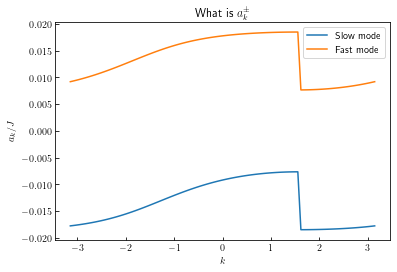

In [11]:
plt.plot(k, alphas[0], label = 'Slow mode')
plt.plot(k, alphas[1], label = 'Fast mode')
plt.xlabel('$k$')
plt.ylabel('$a_k/J$')
plt.title('What is $a_k^{\pm}$')
plt.legend();

## Solving ODEs
***

In [14]:
def edecay(t, y):
    eps = empty(1)
    ckn = empty(len(Ekn))
    ckp = empty(len(Ekp))
    
    eps = y[0]
    ckn = y[1:len(Ekn)+1]
    ckp = y[1+len(Ekn):]
    term1 = -1j * (om * eps) + (dot(akn, ckn) + dot(akp, ckp))/sqrt(N)
    term2 = -1j * (array(Ekn) * ckn) - (akn * eps)/sqrt(N)
    term3 = -1j * (array(Ekp) * ckp) - (akp * eps)/sqrt(N)
    return concatenate(([term1],term2,term3)) 

In [28]:
ts = []
ys = []
for val in [0.50, 0.25, 0.02, 0.01]:
    N = 502
    om = 0.008
    phi = pi/2
    rho_by_j = 1

    k = linspace(-pi, pi, N)
    dt = 0.5 
    t0 = 0.0 
    tf = 1500 
    t_eval = arange(t0, tf, dt) 


    alpha = val
    Ekn = Ek(k, phi, rho_by_j)[0]
    Ekp = Ek(k, phi, rho_by_j)[1]
    akn = alphaK(alpha)[0]
    akp = alphaK(alpha)[1]

    yi =  concatenate(([1 + 0j], zeros(len(Ek(k, phi, rho_by_j)[0])) + 0j, zeros(len(Ekp)) + 0j))
    sol = solve_ivp(edecay, t_span = [t0, tf], y0 = yi, t_eval = t_eval, method="RK45")
    ts.append(sol.t)
    ys.append(sol.y[0])

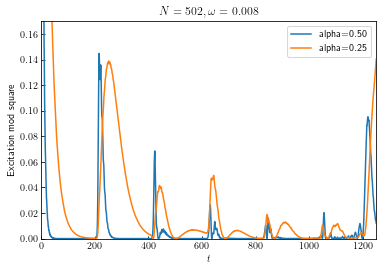

In [31]:
plt.plot(ts[0], abs(ys[0])**2,  label='alpha=0.50')
plt.plot(ts[1], abs(ys[1])**2,  label='alpha=0.25')
plt.title('$N=502,\omega=0.008$')
plt.ylabel('Excitation mod square')
plt.xlabel('$t$')
plt.xlim(0,1250)
plt.ylim(0,0.17)
plt.legend()

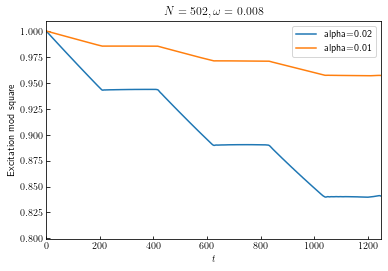

In [32]:
plt.plot(ts[2], abs(ys[2])**2,  label='alpha=0.02')
plt.plot(ts[3], abs(ys[3])**2,  label='alpha=0.01')
plt.title('$N=502,\omega=0.008$')
plt.ylabel('Excitation mod square')
plt.xlabel('$t$')
plt.xlim(0,1250)
plt.legend()

***